In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')

import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa
#from scipy.io import FortranFile as ff
import astropy.units as u
from astropy.constants import M_sun, G


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

np.nonzero((p.cyl_R < radius) & ((abs(p.cyl_z) < height) | (abs(p.cyl_z / p.cyl_R) < 0.3)))

In [2]:
x1 = np.arange(1, 100)
x2 = np.arange(101, 200)

np.nonzero((x1 < 10) & ((x2 < 102) | (x2/x1 < 50)))

(array([0, 2, 3, 4, 5, 6, 7, 8]),)

In [23]:
# Create directory containing the snapshots
snaps = {}
i_snap = 258; f_snap = 258 + 1
for io in range(i_snap, f_snap):
    sn = dis.snapshot(io,'goodold13')
    snaps[io] = sn
    print(io, sn.time)

258 1.046937


In [24]:
sn.sinks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [21]:
sn = snaps[f_snap - 1]
star_pos = sn.sinks[13][0].position; print(star_pos)

KeyError: 13

In [5]:
ds = 0.5**20
w = 200
size = w * ds
extent = size * sn.scaling.l / sn.cgs.au; print(extent,'AU')
cgs_time = sn.scaling.t / sn.cgs.yr 
kms_velocity = (sn.scaling.l / sn.scaling.t) / 1e5 
cgs_density = ((sn.scaling.m/sn.cgs.m_sun) / (sn.scaling.l / sn.cgs.au)**3) / (M_sun.to('kg').value / u.au**3).to('cm**(-3)').value; print(cgs_density)
cgs_density = sn.scaling.d / 0.001; print(cgs_density)
print(sn.scaling.d), print( (sn.scaling.m) / (sn.scaling.l)**3 )

157.38176152030414 AU
9.03259185467041e-06
3.187e-18
3.187e-21
3.187e-21


(None, None)

In [6]:
ff = dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'd')
ux =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'ux')
uy =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'uy')
uz =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'uz')

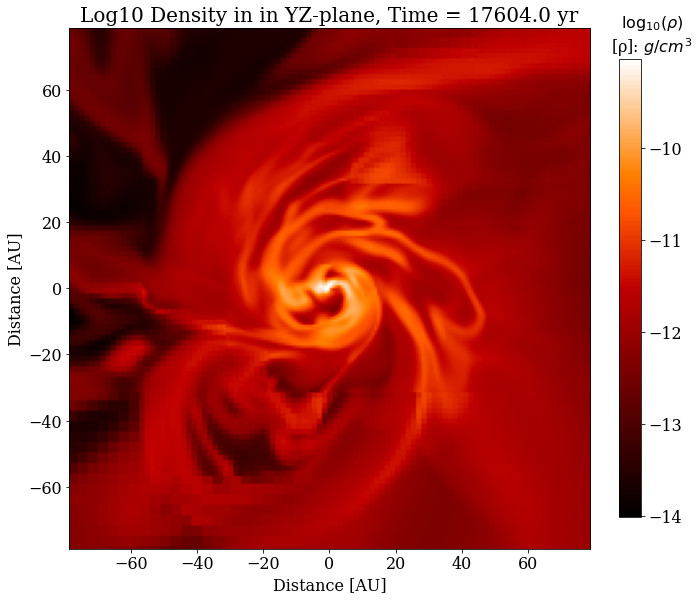

In [7]:
fig, axs = plt.subplots(figsize = (10, 10))

plot_data_d = np.log10(ff[np.shape(ff)[0]//2, :, :] * cgs_density).transpose()

cs = axs.imshow(plot_data_d, cmap = 'gist_heat', extent = (-extent/2, extent/2, -extent/2, extent/2), origin = 'lower')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.04);
cbar.set_label('$\log_{10}(ρ)$\n[ρ]: $g/cm^3$', labelpad = -30, y = 1.1, rotation = 0, fontsize = 16)

axs.set_title(f'Log10 Density in in YZ-plane, Time = {sn.time * cgs_time:3.1f} yr', fontsize = 20)
axs.set_xlabel('Distance [AU]', fontsize = 16); axs.set_ylabel('Distance [AU]', fontsize = 16)


plt.tight_layout()


# Rotation curves
### For the easy first go lets just slice the array as done in the plot above i.e. X = 0

In [8]:
x = np.linspace(-extent/2, extent/2, w)
y = np.linspace(-extent/2, extent/2, w)

0.5592246774175405 111.2857108060911
0.5592246774175405 111.2857108060911


array([  1.        ,   4.82758621,   8.65517241,  12.48275862,
        16.31034483,  20.13793103,  23.96551724,  27.79310345,
        31.62068966,  35.44827586,  39.27586207,  43.10344828,
        46.93103448,  50.75862069,  54.5862069 ,  58.4137931 ,
        62.24137931,  66.06896552,  69.89655172,  73.72413793,
        77.55172414,  81.37931034,  85.20689655,  89.03448276,
        92.86206897,  96.68965517, 100.51724138, 104.34482759,
       108.17241379, 112.        ])

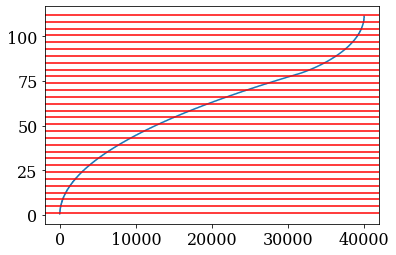

In [9]:
XX, YY = np.meshgrid(x, y)
distances = np.sqrt(XX**2 + YY**2)
print(distances.min(),distances.max())
dist_star = np.linspace(1, 112, 30)

plt.plot(np.sort(distances.flatten()))
print(distances.min(),distances.max())
for r in dist_star:
    plt.axhline(r, c = 'r')
dist_star

In [10]:
mean_vel = np.zeros_like(dist_star)
mag_vel = np.sqrt(uy**2 + uz**2)
prev_r = 0
for i, r in enumerate(dist_star):
        mask = np.ma.masked_values(((distances <= r) & (distances > prev_r)), distances)
     
        mean_vel[i] = np.nanmean(mag_vel[mask])
        #print(np.count_nonzero(np.isnan(mag_vel)))
        prev_r = r

In [11]:
print(dist_star)
dist_star2 = dist_star - 0.5 * np.diff(dist_star)[1]
dist_star2[0] = 0.5
print(dist_star2)

[  1.           4.82758621   8.65517241  12.48275862  16.31034483
  20.13793103  23.96551724  27.79310345  31.62068966  35.44827586
  39.27586207  43.10344828  46.93103448  50.75862069  54.5862069
  58.4137931   62.24137931  66.06896552  69.89655172  73.72413793
  77.55172414  81.37931034  85.20689655  89.03448276  92.86206897
  96.68965517 100.51724138 104.34482759 108.17241379 112.        ]
[  0.5          2.9137931    6.74137931  10.56896552  14.39655172
  18.22413793  22.05172414  25.87931034  29.70689655  33.53448276
  37.36206897  41.18965517  45.01724138  48.84482759  52.67241379
  56.5         60.32758621  64.15517241  67.98275862  71.81034483
  75.63793103  79.46551724  83.29310345  87.12068966  90.94827586
  94.77586207  98.60344828 102.43103448 106.25862069 110.0862069 ]


In [12]:
M_star = sn.sinks[13][0].mass * (sn.scaling.m / sn.cgs.m_sun) * M_sun
kep_vel = (((G * M_star) / (dist_star2 * u.au))**0.5).to('km/s')


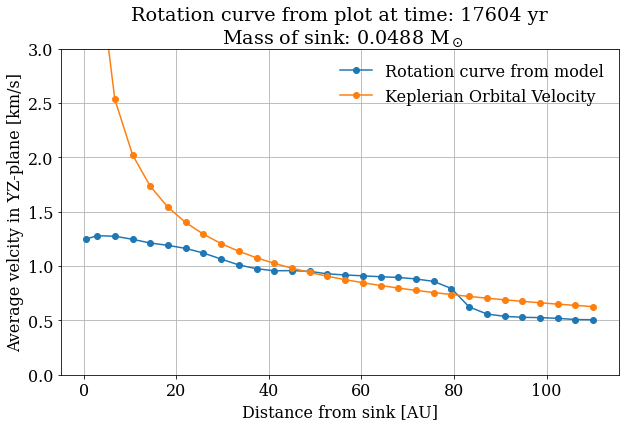

In [13]:
fig, axs = plt.subplots(figsize = (10, 6))
plt.grid()
axs.set(xlabel = 'Distance from sink [AU]', ylabel = 'Average velcity in YZ-plane [km/s]', title = f'Rotation curve from plot at time: {sn.time * cgs_time:4.0f} yr\n Mass of sink: {M_star.value/M_sun.value:0.3} M$_\odot$', ylim = (0, 3))
axs.plot(dist_star2, mean_vel * kms_velocity, marker = 'o', label = 'Rotation curve from model')
axs.plot(dist_star2, kep_vel, label = 'Keplerian Orbital Velocity', marker = 'o')

axs.legend(frameon = False)


# Radial velocities

## Projection of vector a on vector b:
### $$b_a = b\frac{a\cdot b}{|b|^2}$$

In [14]:
print(sn.time * cgs_time)
star_pos = sn.sinks[13][0].position
dist = lambda dist1, dist2: np.sqrt(np.sum((dist1 - dist2)**2))
cgs_length = sn.scaling.l / sn.cgs.au
distance = 1e4 / cgs_length

pp = [p for p in sn.patches if dist(p.position, star_pos) < distance]

17603.99566460253


## $$\hat{AB} = \hat{b} - \hat{a}$$

In [15]:
r_vector = star_pos - pp[0].position

V_mean = np.array([pp[0].var('ux').mean(), pp[0].var('uy').mean(), pp[0].var('uz').mean()])
V_mean

V_r = r_vector * np.dot(V_mean, r_vector) / np.linalg.norm(r_vector)**2
np.linalg.norm(V_r)


0.02896643128893582

In [16]:
log_r = np.logspace(1, 4, 200)
code_Ur = log_r / cgs_length
radial_v = []
evaluted_r = []

prev_r = 0
for i, r in enumerate(code_Ur):
    pp_radius = [p for p in pp if  dist(p.position, star_pos) < r and  dist(p.position, star_pos) > prev_r]
    N = len(pp_radius)
    if len(pp_radius) <= 1:
        continue
    patch_speed_mag = 0
    for i, p in enumerate(pp_radius):
        r_vector = star_pos - p.position
        V_mean = np.array([p.var('ux').mean(), p.var('uy').mean(), p.var('uz').mean()])
        V_r = r_vector * np.dot(V_mean, r_vector) / np.linalg.norm(r_vector)**2
        patch_speed_mag += np.linalg.norm(V_r) 
    radial_v.append(patch_speed_mag / N)
    evaluted_r.append(r - 0.5 * (r - prev_r))
    prev_r = r

radial_v = np.array(radial_v); evaluted_r = np.array(evaluted_r)

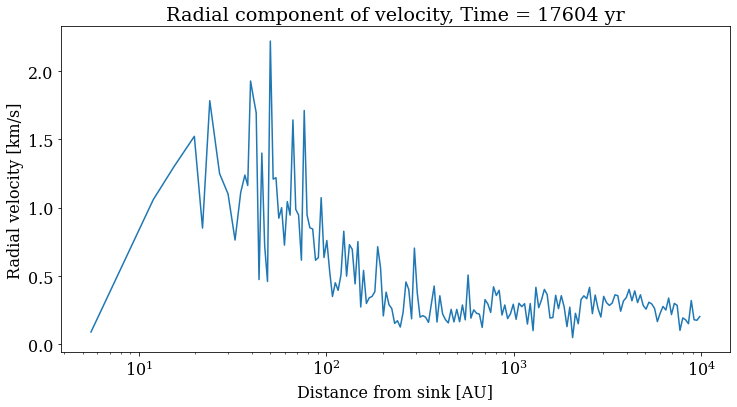

In [17]:
fig, axs = plt.subplots(figsize = (12, 6))

axs.set(title = f'Radial component of velocity, Time = {sn.time * cgs_time:4.0f} yr', ylabel = 'Radial velocity [km/s]', xlabel = 'Distance from sink [AU]')
axs.semilogx(evaluted_r * cgs_length, radial_v * kms_velocity)

## Doing the same plot as above but with mass accretion

In [18]:
log_r = np.logspace(1, 4, 200)
code_Ur = log_r / cgs_length
m_dot = []
evaluted_r = []

prev_r = 0
for i, r in enumerate(code_Ur):
    pp_radius = [p for p in pp if  dist(p.position, star_pos) < r and  dist(p.position, star_pos) > prev_r]
    N = len(pp_radius)
    if len(pp_radius) <= 1:
        continue
    patch_speed_mag = 0
    shell_accretion = 0
    shell_vol = 0
    for i, p in enumerate(pp_radius):
        r_vector = star_pos - p.position
        V_mean = np.array([p.var('ux').mean(), p.var('uy').mean(), p.var('uz').mean()])
        V_r = r_vector * np.dot(V_mean, r_vector) / np.linalg.norm(r_vector)**2
        patch_speed_mag = np.linalg.norm(V_r) 
        patch_mass = p.var('d').mean() * np.prod(p.size)
        shell_accretion += patch_speed_mag * patch_mass * (r - prev_r)
        
    m_dot.append(shell_accretion / N)
    evaluted_r.append(r - 0.5 * (r - prev_r))
    prev_r = r

m_dot = np.array(m_dot); evaluted_r = np.array(evaluted_r)

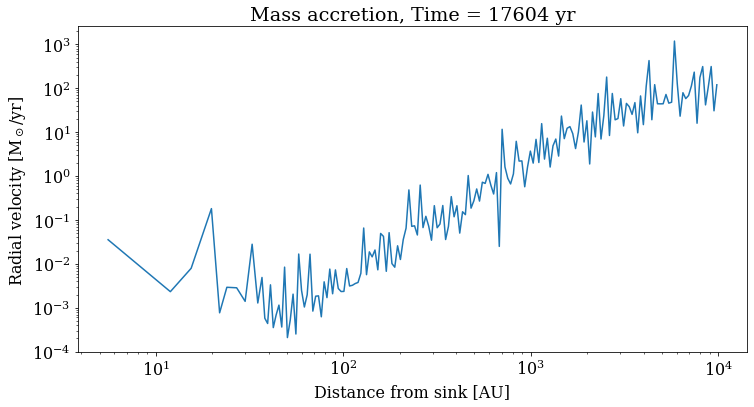

In [19]:
msun_unit = sn.scaling.m / sn.cgs.m_sun

fig, axs = plt.subplots(figsize = (12, 6))

axs.set(title = f'Mass accretion, Time = {sn.time * cgs_time:4.0f} yr', ylabel = 'Radial velocity [M$_\odot$/yr]', xlabel = 'Distance from sink [AU]')
axs.loglog(evaluted_r * cgs_length, m_dot * msun_unit * cgs_time)